In [1]:
from ultralytics import YOLO
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
model = YOLO("../yolo11s.pt")
model.export(format="onnx")  # creates 'yolo11n.onnx'
onnx_model = YOLO("../yolo11s.onnx")
results = onnx_model("https://ultralytics.com/images/bus.jpg")

Ultralytics 8.3.73 🚀 Python-3.10.16 torch-2.5.1 CPU (Apple M1)
YOLO11s summary (fused): 238 layers, 9,443,760 parameters, 0 gradients, 21.5 GFLOPs

PyTorch: starting from '../yolo11s.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (18.4 MB)

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.48...
ONNX: export success ✅ 1.1s, saved as '../yolo11s.onnx' (36.3 MB)

Export complete (1.5s)
Results saved to /Users/mnjm/workspace/wobot_assignment
Predict:         yolo predict task=detect model=../yolo11s.onnx imgsz=640  
Validate:        yolo val task=detect model=../yolo11s.onnx imgsz=640 data=/usr/src/ultralytics/ultralytics/cfg/datasets/coco.yaml  
Visualize:       https://netron.app
WARNING ⚠️ Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.
Loading ../yolo11s.onnx for ONNX Runtime inference...
Using ONNX Runtime 

In [3]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

In [6]:
results[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([5., 0., 0., 0., 0.])
conf: tensor([0.9375, 0.8990, 0.8978, 0.8814, 0.7183])
data: tensor([[2.9232e+01, 2.2647e+02, 7.9803e+02, 7.3758e+02, 9.3748e-01, 5.0000e+00],
        [2.2284e+02, 4.0519e+02, 3.4481e+02, 8.5750e+02, 8.9903e-01, 0.0000e+00],
        [4.8652e+01, 4.0102e+02, 2.4643e+02, 9.0482e+02, 8.9779e-01, 0.0000e+00],
        [6.6886e+02, 3.8950e+02, 8.0952e+02, 8.8060e+02, 8.8143e-01, 0.0000e+00],
        [0.0000e+00, 5.4584e+02, 7.9089e+01, 8.7433e+02, 7.1830e-01, 0.0000e+00]])
id: None
is_track: False
orig_shape: (1080, 810)
shape: torch.Size([5, 6])
xywh: tensor([[413.6294, 482.0224, 768.7938, 511.1081],
        [283.8212, 631.3470, 121.9719, 452.3068],
        [147.5432, 652.9205, 197.7823, 503.7952],
        [739.1859, 635.0511, 140.6605, 491.1012],
        [ 39.5443, 710.0826,  79.0886, 328.4948]])
xywhn: tensor([[0.5107, 0.4463, 0.9491, 0.4732],
        [0.3504, 0.5846, 0.1506, 0.4188],
        [0.18

In [7]:
class_names = onnx_model.names
class_names

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

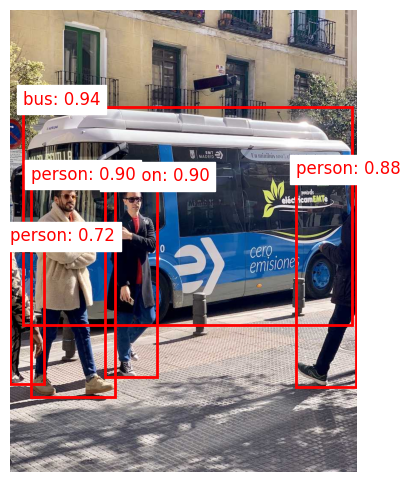

In [11]:
image = cv2.imread("./bus.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Plot the image
plt.figure(figsize=(10, 6))
plt.imshow(image)

# Draw bounding boxes
ax = plt.gca()
for result in results:
    for box, conf, cls in zip(result.boxes.xyxy, result.boxes.conf, result.boxes.cls):
        x1, y1, x2, y2 = map(int, box)
        label = class_names[int(cls)]
        score = float(conf)
        ax.add_patch(
            plt.Rectangle(
                (x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor="red", linewidth=2
            )
        )
        text = f"{label}: {score:.2f}"
        ax.text(x1, y1 - 5, text, color="red", fontsize=12, backgroundcolor="white")

plt.axis("off")
plt.show()
